# Objective

* Identify the Which Platform have more impact on Sales 

* To build the Model which will help to Predict the future sales based on Money invest in Different Platform 

In [1]:
################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


# Data Import

In [2]:
new = pd.read_excel(r"C:\Users\justw\Downloads\Machine Learning with Python\Linear Regression\Practise\AirPollution.xls") #for an earlier version of Excel, you may need to use the file extension of 'xls'

new

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2,Site,Date,Season
0,120.71,2.67,0.01,0.53,0.61,0,84.17,40.37,Mandai,2004-02-07,Summer
1,140.25,3.49,0.02,0.10,0.91,0,88.81,39.48,Mandai,2004-02-14,Summer
2,107.01,1.31,0.01,0.19,0.48,0,81.49,48.29,Mandai,2004-02-21,Summer
3,88.81,0.76,0.00,0.33,0.39,0,61.80,27.42,Mandai,2004-02-28,Summer
4,75.05,0.60,0.00,0.41,1.54,0,48.71,19.23,Mandai,2004-03-06,Summer
...,...,...,...,...,...,...,...,...,...,...,...
146,40.13,0.10,0.00,0.04,0.09,0,18.88,10.09,Bhosari,2004-09-01,Monsoon
147,40.38,0.10,0.00,0.03,0.09,0,47.56,24.14,Bhosari,2004-09-08,Monsoon
148,31.28,0.11,0.00,0.02,0.05,0,31.53,26.64,Bhosari,2004-09-15,Monsoon
149,52.10,0.48,0.00,0.04,0.06,0,42.08,22.95,Bhosari,2004-09-22,Monsoon


In [3]:
new1=new.drop(['Site','Date','Season'],axis=1)
new1

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
0,120.71,2.67,0.01,0.53,0.61,0,84.17,40.37
1,140.25,3.49,0.02,0.10,0.91,0,88.81,39.48
2,107.01,1.31,0.01,0.19,0.48,0,81.49,48.29
3,88.81,0.76,0.00,0.33,0.39,0,61.80,27.42
4,75.05,0.60,0.00,0.41,1.54,0,48.71,19.23
...,...,...,...,...,...,...,...,...
146,40.13,0.10,0.00,0.04,0.09,0,18.88,10.09
147,40.38,0.10,0.00,0.03,0.09,0,47.56,24.14
148,31.28,0.11,0.00,0.02,0.05,0,31.53,26.64
149,52.10,0.48,0.00,0.04,0.06,0,42.08,22.95


# Data Type 

In [4]:
new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM10    151 non-null    float64
 1   Pb      151 non-null    float64
 2   Cd      151 non-null    float64
 3   Cu      151 non-null    float64
 4   Cr      151 non-null    float64
 5   Zn      151 non-null    int64  
 6   NOx     151 non-null    float64
 7   SO2     151 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 9.6 KB


# Univariate Analysis

In [5]:
# Let's look at some statistical information about our dataframe.
new1.describe() 

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.0,151.000000,151.000000
mean,68.536026,0.716358,0.000265,0.331854,0.390066,0.0,42.692914,22.359868
std,40.908548,0.673069,0.001982,0.408259,0.434575,0.0,23.101723,10.393498
min,16.240000,0.000000,0.000000,0.000000,0.000000,0.0,8.260000,0.000000
25%,37.005000,0.220000,0.000000,0.040000,0.085000,0.0,25.735000,15.165000
50%,59.610000,0.570000,0.000000,0.130000,0.230000,0.0,37.000000,20.930000
75%,89.820000,0.965000,0.000000,0.535000,0.580000,0.0,54.695000,27.420000
max,194.740000,3.490000,0.020000,1.650000,3.220000,0.0,121.460000,53.270000


# EDA
* Identify & Treatment of Outlier 

<AxesSubplot:ylabel='PM10'>

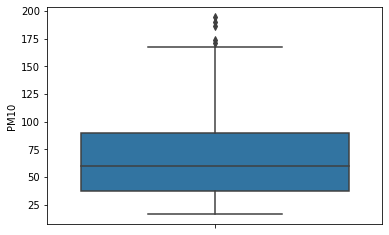

In [6]:
sns.boxplot(y='PM10',data=new1)

<AxesSubplot:ylabel='Pb'>

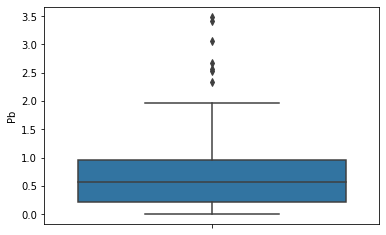

In [7]:
sns.boxplot(y='Pb',data=new1)

<AxesSubplot:ylabel='Cd'>

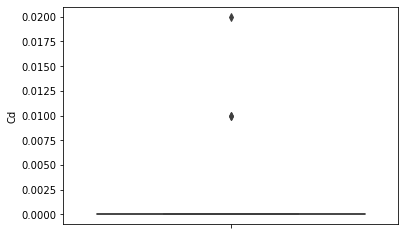

In [8]:
sns.boxplot(y='Cd',data=new1)

<AxesSubplot:ylabel='Cu'>

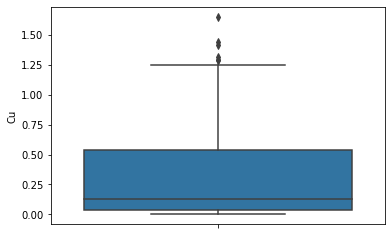

In [9]:
sns.boxplot(y='Cu',data=new1)

<AxesSubplot:ylabel='Cr'>

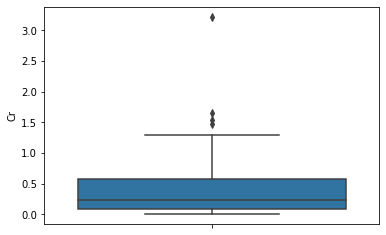

In [10]:
sns.boxplot(y='Cr',data=new1)

<AxesSubplot:ylabel='Zn'>

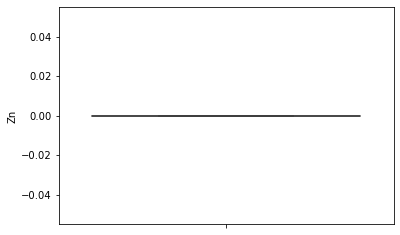

In [11]:
sns.boxplot(y='Zn',data=new1)

<AxesSubplot:ylabel='NOx'>

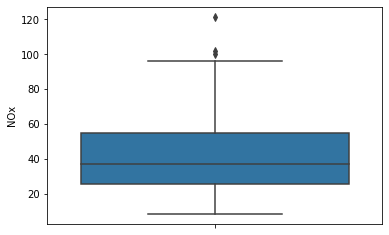

In [12]:
sns.boxplot(y='NOx',data=new1)

<AxesSubplot:ylabel='SO2'>

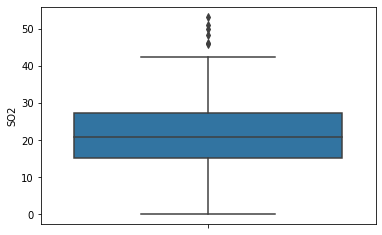

In [13]:
sns.boxplot(y='SO2',data=new1)

### Winsorizing Technique -- Treatment of Outlier

In [14]:
q1 = new1['PM10'].quantile(0.25)
q3 = new1['PM10'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

169.0425

In [15]:
new1['PM10']=np.where(new1['PM10'] > upper_limit,upper_limit,new1['PM10']) # upper limit

In [16]:
q1 = new1['Pb'].quantile(0.25)
q3 = new1['Pb'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

2.0825

In [17]:
new1['Pb']=np.where(new1['Pb'] > upper_limit,upper_limit,new1['Pb']) # upper limit

In [18]:
q1 = new1['Cd'].quantile(0.25)
q3 = new1['Cd'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

0.0

In [60]:
new1['Cd']=np.where(new1['Cd'] > upper_limit,upper_limit,new1['Cd']) # upper limit

In [20]:
q1 = new1['Cu'].quantile(0.25)
q3 = new1['Cu'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

1.2775

In [21]:
new1['Cu']=np.where(new1['Cu'] > upper_limit,upper_limit,new1['Cu']) # upper limit

In [22]:
q1 = new1['Cr'].quantile(0.25)
q3 = new1['Cr'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

1.3224999999999998

In [23]:
new1['Cr']=np.where(new1['Cr'] > upper_limit,upper_limit,new1['Cr']) # upper limit

In [24]:
q1 = new1['NOx'].quantile(0.25)
q3 = new1['NOx'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

98.13499999999999

In [25]:
new1['NOx']=np.where(new1['NOx'] > upper_limit,upper_limit,new1['NOx']) # upper limit

In [26]:
q1 = new1['SO2'].quantile(0.25)
q3 = new1['SO2'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

45.80250000000001

In [27]:
new1['SO2']=np.where(new1['SO2'] > upper_limit,upper_limit,new1['SO2']) # upper limit

<AxesSubplot:>

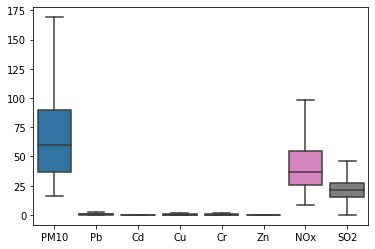

In [28]:
sns.boxplot(data=new1)

In [29]:
# Let's look at some statistical information about our dataframe.
new1.describe() 

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
count,151.00000,151.000000,151.0,151.000000,151.000000,151.0,151.000000,151.000000
mean,68.06856,0.679983,0.0,0.327053,0.372848,0.0,42.501755,22.226656
std,39.61346,0.560941,0.0,0.395327,0.361985,0.0,22.551657,10.049931
min,16.24000,0.000000,0.0,0.000000,0.000000,0.0,8.260000,0.000000
25%,37.00500,0.220000,0.0,0.040000,0.085000,0.0,25.735000,15.165000
50%,59.61000,0.570000,0.0,0.130000,0.230000,0.0,37.000000,20.930000
75%,89.82000,0.965000,0.0,0.535000,0.580000,0.0,54.695000,27.420000
max,169.04250,2.082500,0.0,1.277500,1.322500,0.0,98.135000,45.802500


In [30]:
new2=new1.drop(['Cd','Zn'],axis=1)
new2

,PM10,Pb,Cu,Cr,NOx,SO2
0,120.71,2.0825,0.53,0.6100,84.17,40.3700
1,140.25,2.0825,0.10,0.9100,88.81,39.4800
2,107.01,1.3100,0.19,0.4800,81.49,45.8025
3,88.81,0.7600,0.33,0.3900,61.80,27.4200
4,75.05,0.6000,0.41,1.3225,48.71,19.2300
...,...,...,...,...,...,...
146,40.13,0.1000,0.04,0.0900,18.88,10.0900
147,40.38,0.1000,0.03,0.0900,47.56,24.1400
148,31.28,0.1100,0.02,0.0500,31.53,26.6400
149,52.10,0.4800,0.04,0.0600,42.08,22.9500


In [31]:
new2.isna().sum()  # no missing data

PM10    0
Pb      0
Cu      0
Cr      0
NOx     0
SO2     0
dtype: int64

# Step 3 : Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [32]:
new2.head()

,PM10,Pb,Cu,Cr,NOx,SO2
0,120.71,2.0825,0.53,0.6100,84.17,40.3700
1,140.25,2.0825,0.10,0.9100,88.81,39.4800
2,107.01,1.3100,0.19,0.4800,81.49,45.8025
3,88.81,0.7600,0.33,0.3900,61.80,27.4200
4,75.05,0.6000,0.41,1.3225,48.71,19.2300


In [61]:
# Putting feature variable to X
X = new2.drop('PM10', axis= 1)

# Putting response variable to y
y = new2[['PM10']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

In [34]:
df = pd.concat([y_train, X_train], axis=1)
df.head()

,PM10,Pb,Cu,Cr,NOx,SO2
125,26.19,0.00,0.16,0.04,22.14,10.93
48,40.92,0.39,0.08,0.21,26.00,13.66
149,52.10,0.48,0.04,0.06,42.08,22.95
55,90.48,0.72,0.00,0.02,39.16,15.72
63,141.11,1.39,0.53,0.71,80.72,34.31


# Correlation Matrix

In [35]:
df.corr()

,PM10,Pb,Cu,Cr,NOx,SO2
PM10,1.000000,0.881124,0.696160,0.841537,0.551074,0.519019
Pb,0.881124,1.000000,0.643005,0.771554,0.649313,0.595104
Cu,0.696160,0.643005,1.000000,0.759803,0.444826,0.433378
Cr,0.841537,0.771554,0.759803,1.000000,0.475384,0.438371
NOx,0.551074,0.649313,0.444826,0.475384,1.000000,0.860182
SO2,0.519019,0.595104,0.433378,0.438371,0.860182,1.000000


<AxesSubplot:>

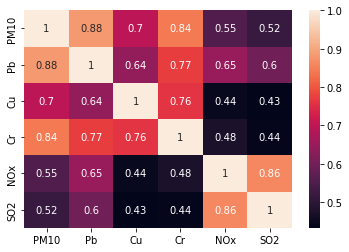

In [36]:
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:title={'center':'PM10 vs Pb'}, xlabel='Pb', ylabel='PM10'>

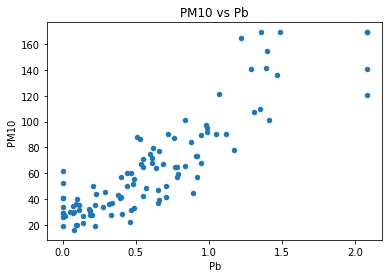

In [37]:
df.plot.scatter(x='Pb', y='PM10', title='PM10 vs Pb')

#### TV have 88%  strong positve correlation with PM10

* Pb have high impact on PM10
* There is no colinearity in data, So every platform is independent 

### Multicolinearity (with the help of VIF)

In [39]:
X1=df.drop(['PM10','NOx'],axis=1)
series_before = pd.Series([(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Pb     ([[0.0, 0.16, 0.04, 10.93], [0.39, 0.08, 0.21,...
Cu     ([[0.0, 0.16, 0.04, 10.93], [0.39, 0.08, 0.21,...
Cr     ([[0.0, 0.16, 0.04, 10.93], [0.39, 0.08, 0.21,...
SO2    ([[0.0, 0.16, 0.04, 10.93], [0.39, 0.08, 0.21,...
dtype: object

In [40]:
X1=df.drop(['PM10'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Pb      8.256261
Cu      3.752367
Cr      6.591469
NOx    21.747451
SO2    19.438557
dtype: float64

In [41]:
X2=df.drop(['PM10','NOx'],axis=1)
series_before = pd.Series([variance_inflation_factor(X2.values, i) 
                           for i in range(X2.shape[1])],  # i=0,1,2
                          index=X2.columns)  # column name
series_before

Pb     7.687853
Cu     3.751185
Cr     6.589538
SO2    3.835246
dtype: float64

* No collinearity in the data 

# Model Building

*  H0 :- There is no Linear relationship between sales and tv , radio & newspaper

* Vs 

*  H1 :- There is Linear relationship between sales and tv , radio & newspaper

Alpha = 0.05 (5%)

In [42]:
import statsmodels.formula.api as smf
model = smf.ols('PM10 ~ Pb+Cu+Cr+SO2',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     133.6
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           3.25e-39
Time:                        19:04:22   Log-Likelihood:                -435.83
No. Observations:                 105   AIC:                             881.7
Df Residuals:                     100   BIC:                             894.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.6108      3.865      5.850      0.000      14.942      30.279
Pb            43.6485      5.405      8.076      0.000      32.926      54.371
Cu             6.6132      7.008      0.944      0.348      -7.291      20.517
Cr            40.1701      8.294      4.843      0.000      23.715      56.625
SO2           -0.0051      0.205     -0.025      0.980      -0.412       0.401
==============================================================================
Omnibus:                        2.997   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.224   Jarque-Bera (JB):                2.765
Skew:                           0.397   Prob(JB):                        0.251
Kurtosis:                       2.974   Cond. No.                         151.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* There is Linear relationship between sales and tv , radio
* There is no Linear relationship between sales and NewsPaper 
 * so we will remove and re-run the model 
* 91% is accuracy of model , so we say model is good fit 

In [43]:
# removing the insignificant variable 
model2=smf.ols('PM10 ~ Pb+Cu+Cr',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     180.0
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           2.22e-40
Time:                        19:04:26   Log-Likelihood:                -435.83
No. Observations:                 105   AIC:                             879.7
Df Residuals:                     101   BIC:                             890.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5354      2.409      9.353      0.000      17.756      27.315
Pb            43.5895      4.839      9.007      0.000      33.990      53.189
Cu             6.5914      6.919      0.953      0.343      -7.134      20.317
Cr            40.1912      8.210      4.895      0.000      23.905      56.478
==============================================================================
Omnibus:                        3.015   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                2.779
Skew:                           0.398   Prob(JB):                        0.249
Kurtosis:                       2.977   Cond. No.                         8.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# removing the insignificant variable 
model2=smf.ols('PM10 ~ Pb+Cr',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     269.7
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           1.87e-41
Time:                        19:04:32   Log-Likelihood:                -436.30
No. Observations:                 105   AIC:                             878.6
Df Residuals:                     102   BIC:                             886.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.4490      2.407      9.328      0.000      17.675      27.223
Pb            44.2223      4.791      9.230      0.000      34.719      53.726
Cr            44.4242      6.901      6.438      0.000      30.737      58.111
==============================================================================
Omnibus:                        2.564   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.278   Jarque-Bera (JB):                2.275
Skew:                           0.360   Prob(JB):                        0.321
Kurtosis:                       3.019   Cond. No.                         6.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* There is Linear relationship between sales and tv , radio
* 91% is accuracy of model , so we say model is good fit 
* Y = 2.8144 + 0.0476 * TV + 0.1863 * Radio

# Multicolinearity (with the help of VIF)

In [45]:
X1=df.loc[:,['Pb', 'Cr']]
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], 
                          index=X1.columns)
series_before

Pb    4.650496
Cr    4.650496
dtype: float64

# Assumption of Model

* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distibuted

In [46]:
df.head()

,PM10,Pb,Cu,Cr,NOx,SO2
125,26.19,0.00,0.16,0.04,22.14,10.93
48,40.92,0.39,0.08,0.21,26.00,13.66
149,52.10,0.48,0.04,0.06,42.08,22.95
55,90.48,0.72,0.00,0.02,39.16,15.72
63,141.11,1.39,0.53,0.71,80.72,34.31


In [47]:
# Y = intercet + b1 * Tv + b2 * radio
Y = 22.4490+44.2223*0.39+0*0+44.4242*0.21+0*0
Y

49.024779

In [48]:
df['fitted_value']=model2.fittedvalues #Predicted Value
df['residual']=model2.resid  #Error
df.head()

,PM10,Pb,Cu,Cr,NOx,SO2,fitted_value,residual
125,26.19,0.00,0.16,0.04,22.14,10.93,24.225925,1.964075
48,40.92,0.39,0.08,0.21,26.00,13.66,49.024738,-8.104738
149,52.10,0.48,0.04,0.06,42.08,22.95,46.341115,5.758885
55,90.48,0.72,0.00,0.02,39.16,15.72,55.177501,35.302499
63,141.11,1.39,0.53,0.71,80.72,34.31,115.459146,25.650854


# Linearity

<AxesSubplot:title={'center':'PM10 vs Pb'}, xlabel='Pb', ylabel='PM10'>

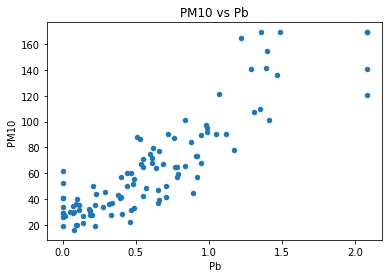

In [49]:
df.plot.scatter(x='Pb', y='PM10', title='PM10 vs Pb')

# Homoscedasicity

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

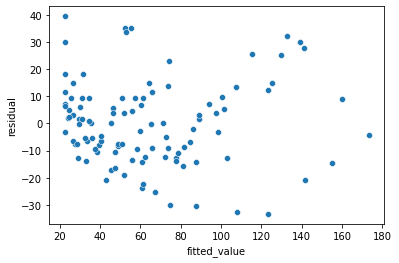

In [50]:
sns.scatterplot(x='fitted_value', y='residual',data=df)

# Normality

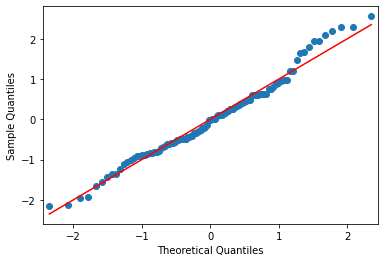

In [51]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

# Model Error are IID 

<AxesSubplot:ylabel='Frequency'>

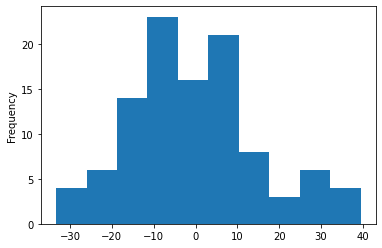

In [52]:
df['residual'].plot.hist()

# Prediction on Test Data (unseen data)

In [53]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,Pb,Cu,Cr,NOx,SO2,PM10
62,1.42,0.11,0.92,95.74,45.8025,153.89
143,0.00,0.00,0.00,30.52,24.5100,37.08
86,1.86,0.97,0.79,78.57,28.7700,99.98
80,0.81,0.83,0.54,39.49,14.8700,81.15
100,0.98,0.97,0.94,33.19,19.1500,101.86


In [54]:
df_test['Prediction']=model2.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,Pb,Cu,Cr,NOx,SO2,PM10,Prediction
62,1.42,0.11,0.92,95.74,45.8025,153.89,126.114898
143,0.00,0.00,0.00,30.52,24.5100,37.08,22.448956
86,1.86,0.97,0.79,78.57,28.7700,99.98,139.797566
80,0.81,0.83,0.54,39.49,14.8700,81.15,82.258094
100,0.98,0.97,0.94,33.19,19.1500,101.86,107.545567


In [55]:
Y =22.4490+44.2223*1.42+0*0+44.4242*0.92+0*0 # one row prediction ( Manual)
Y

126.11492999999999

# Test

In [56]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.PM10, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.74


# Train

In [57]:
from sklearn.metrics import r2_score
r2 = r2_score(df.PM10, df.fitted_value)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.84


* Model is good fit & Performance on Test data is also good fit 

# Prediction for Live Data  -- Population

In [58]:
d1 = {'Customer':pd.Series(['MANALI','SHIVAM','KOMAL']),
      'TV'      :pd.Series([93.9,73.5,200]),
      'radio'   :pd.Series([43.5,18,35]),
      'newspaper':pd.Series([50.5,13,24]),
     }
live = pd.DataFrame(d1)
live

,Customer,TV,radio,newspaper
0,MANALI,93.9,43.5,50.5
1,SHIVAM,73.5,18.0,13.0
2,KOMAL,200.0,35.0,24.0


In [59]:
live['future Prediction']=np.round(model.predict(live),2)
live

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'Pb' is not defined
    PM10 ~ Pb+Cu+Cr+SO2
           ^^

# Finish